### Import Libraries and Data Set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
data1=pd.read_csv("NewspaperData.csv")
data1.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


### EDA

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [4]:
data1.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [5]:
data1.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


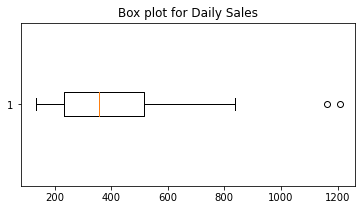

In [6]:
# Boxplot for daily column

plt.figure(figsize=(6,3))
plt.title("Box plot for Daily Sales")
plt.boxplot(data1["daily"],vert=False)
plt.show()

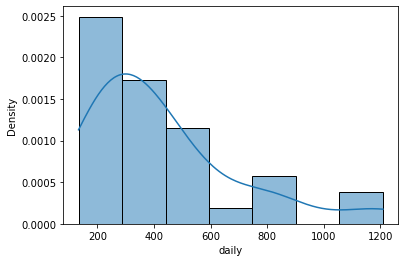

In [7]:
sns.histplot(data1["daily"],kde=True ,stat='density',)
plt.show()

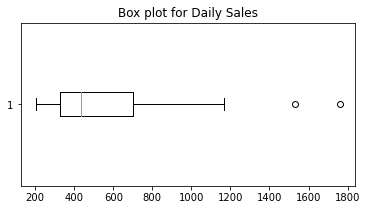

In [8]:
plt.figure(figsize=(6,3))
plt.title("Box plot for Daily Sales")
plt.boxplot(data1["sunday"],vert=False)
plt.show()

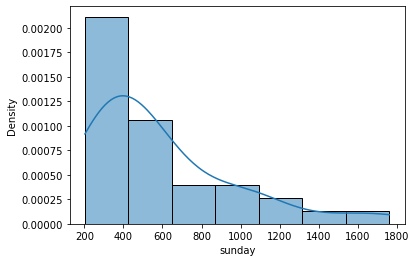

In [9]:
sns.histplot(data1["sunday"],kde=True ,stat='density',)
plt.show()

### Observations
- There are no missing values
- The daily column values appears to be right-skewed
- The sunday values also appear to be right-skewed
- There are two outliers in both daily column and aslo in sunday column as observed from the table

### Scatter plot and Correlation Strength

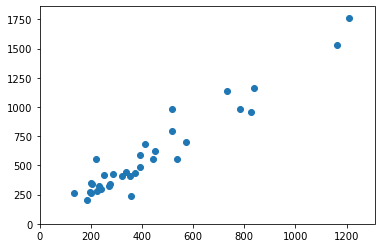

In [10]:
x=data1["daily"]
y=data1["sunday"]
plt.scatter(data1["daily"],data1["sunday"])
plt.xlim(0,max(x)+100)
plt.ylim(0,max(y)+100)
plt.show()

In [11]:
data1["daily"].corr(data1["sunday"])

0.9581543140785462

In [12]:
data1[["daily","sunday"]].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


### Observations on Correlation strength
- The relationship between x(daily) and y(sunday) is seen to be linear as seen from scatter plot
- The correlation is strong and positive with Pearson's correlation coefficient of 0.958154

#### Fit a Linear Regression Model

In [14]:
# Build regression model

import statsmodels.formula.api as smf
model1=smf.ols("sunday~daily",data=data1).fit()

In [15]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        12:38:58   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""